# Homework 2, Part 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_1100\2876882311.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read the Kaggle csv file
df = pd.read_csv("bestsellers with categories.csv")

df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [3]:
# check the shape of the DF
print(f"DF shape: {df.shape}")  # 550 rows by 7 columns

df.describe()

DF shape: (550, 7)


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [4]:
# get column names
print(df.columns)

# change column names and check the result
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]

print(df.columns)

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')
Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [5]:
# check if the DF has missing values
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [6]:
# check unique values in the genre column
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [7]:
# define min, max, mean, and median prices
print(f"Min price: {df["price"].min()}")
print(f"Max price: {df["price"].max()}")
print(f"Average price: {df["price"].mean()}")
print(f"Median price: {df["price"].median()}")

Min price: 0
Max price: 105
Average price: 13.1
Median price: 11.0


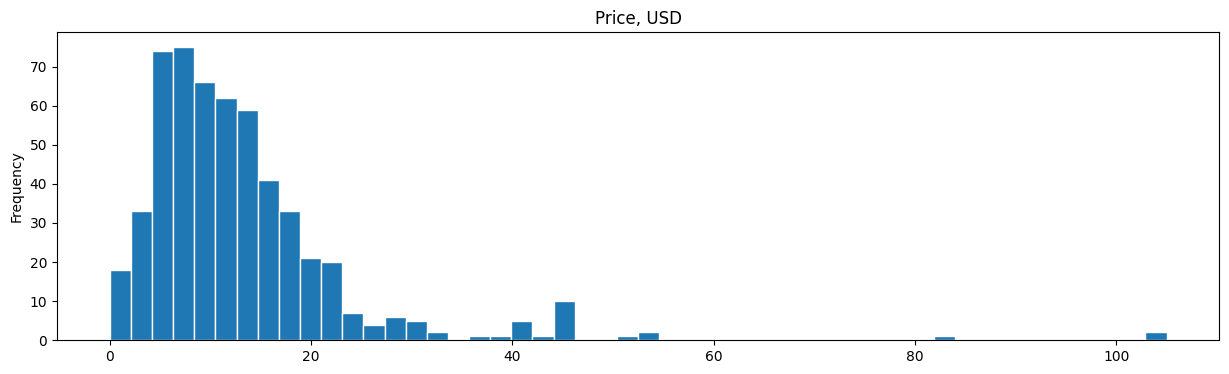

In [8]:
# build a price histogram
plt.title("Price, USD")

df["price"].plot(kind="hist", edgecolor="white", bins=50, figsize=(15, 4))

plt.show()

In [9]:
# define the highest user rating
print(f"Highest rating: {df["user_rating"].max()}")

Highest rating: 4.9


In [10]:
# how many books have such a rating
print(f"{df[df.user_rating == 4.9].shape[0]} books have the user rating of {df["user_rating"].max()}")

52 books have the user rating of 4.9


In [11]:
# which book has the most reviews
most_reviews = df["reviews"].max()
most_reviews_book_index = df["reviews"].idxmax()
most_reviews_book_author = df.loc[most_reviews_book_index, "author"]
most_reviews_book_name = df.loc[most_reviews_book_index, "name"]

print(f"\"{most_reviews_book_name}\" by {most_reviews_book_author} has {most_reviews} reviews.")

"Where the Crawdads Sing" by Delia Owens has 87841 reviews.


In [12]:
# calculate how many fiction books became top-50 in 2010 
fiction_books = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
print(f"{len(fiction_books)} fiction books.")

20 fiction books.


In [13]:
# define how many books with rating 4.9 entered the top-50 rating in 2010 and 2011
top_books = df[(df["user_rating"] == 4.9) & (df["year"].isin([2010, 2011]))]

print(f"{len(top_books)} books entered the top-50 rating in 2010 and 2011 with rating 4.9")

1 books entered the top-50 rating in 2010 and 2011 with rating 4.9


In [14]:
# sort the books that entered the rating in 2015 by their price (ascending), and that cost less than 8 USD
sorted_price_2015 = df[(df["year"] == 2015) & (df["price"] < 8)].sort_values(by="price", ascending=True)

sorted_price_2015.head(10)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [15]:
# define the last book in the sorted list
print(f"The last book in the list is \"{sorted_price_2015["name"].iloc[-1]}\"")

The last book in the list is "Old School (Diary of a Wimpy Kid #10)"


In [16]:
# define min and max prices for each genre
min_max_price = df.groupby("genre")["price"].agg(["min", "max"]).reset_index()

print(min_max_price)
print()
print(f"Minimal price for a fiction book is 0 USD")
print(f"Minimal price for a non-fiction book is 0 USD")
print(f"Maximum price for a fiction book is 82 USD")
print(f"Maximum price for a non-fiction book is 105 USD")

         genre  min  max
0      Fiction    0   82
1  Non Fiction    0  105

Minimal price for a fiction book is 0 USD
Minimal price for a non-fiction book is 0 USD
Maximum price for a fiction book is 82 USD
Maximum price for a non-fiction book is 105 USD


In [17]:
# define the size of the DF by authors
books_by_authors = df.groupby("author").agg(total=("name", "count")).reset_index()

print(f"The DF has {books_by_authors.shape[0]} rows and {books_by_authors.shape[1]} columns.")

The DF has 248 rows and 2 columns.


In [18]:
# create a new DF for some specific author with the most written books
df_new = df.groupby("author").agg(total=('name', 'count')).reset_index()
author_max_books = df_new.max()

print(author_max_books)

author    Zhi Gang Sha
total               12
dtype: object


In [19]:
# create another DF that will contain average rating for each author
df_mean_rating = df.groupby("author").agg(average_rating=("user_rating", "mean")).reset_index()

df_mean_rating

,author,average_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [20]:
# define the author who has the minimal rating
print(f"{df_mean_rating.loc[df_mean_rating["average_rating"].idxmin(), "author"]} has the minimal average rating of {df_mean_rating["average_rating"].min()}.")

Donna Tartt has the minimal average rating of 3.9.


In [21]:
# concatenate two last DFs
df_concatenated = pd.concat([df_new.set_index("author"), df_mean_rating.set_index("author")], axis=1, join="inner").sort_values(by=["total", "average_rating"], ascending=[True, True]).reset_index()

df_concatenated.head(10)

,author,total,average_rating
0,Muriel Barbery,1,4.0
1,Chris Cleave,1,4.1
2,Ian K. Smith M.D.,1,4.1
3,Pierre Dukan,1,4.1
4,Elizabeth Strout,1,4.2
5,Geneen Roth,1,4.2
6,Mark Hyman M.D.,1,4.2
7,Mark Twain,1,4.2
8,Michael Wolff,1,4.2
9,Rob Bell,1,4.2


In [22]:
# define the author who is the first in the list
print(f"{df_concatenated["author"][0]}")

Muriel Barbery


## Visualization

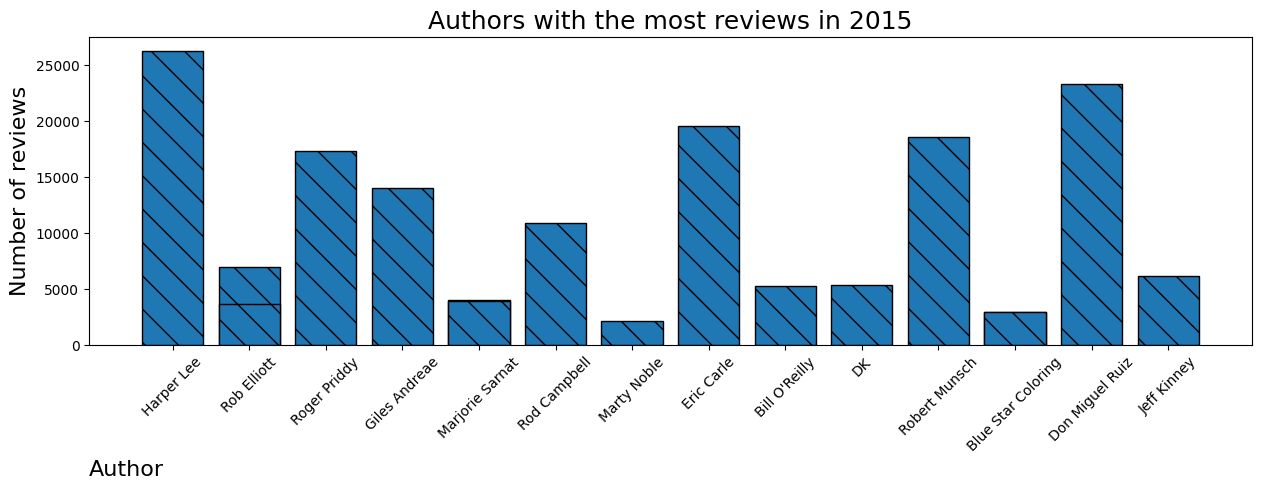

In [23]:
plt.figure(figsize=(15, 4))

plt.title("Authors with the most reviews in 2015", fontsize=18)
plt.ylabel("Number of reviews", fontsize=16)
plt.xlabel("Author", loc="left", fontsize=16)

plt.bar(sorted_price_2015["author"], sorted_price_2015["reviews"], hatch="\\", edgecolor="black")

plt.xticks(rotation=45)

plt.show()

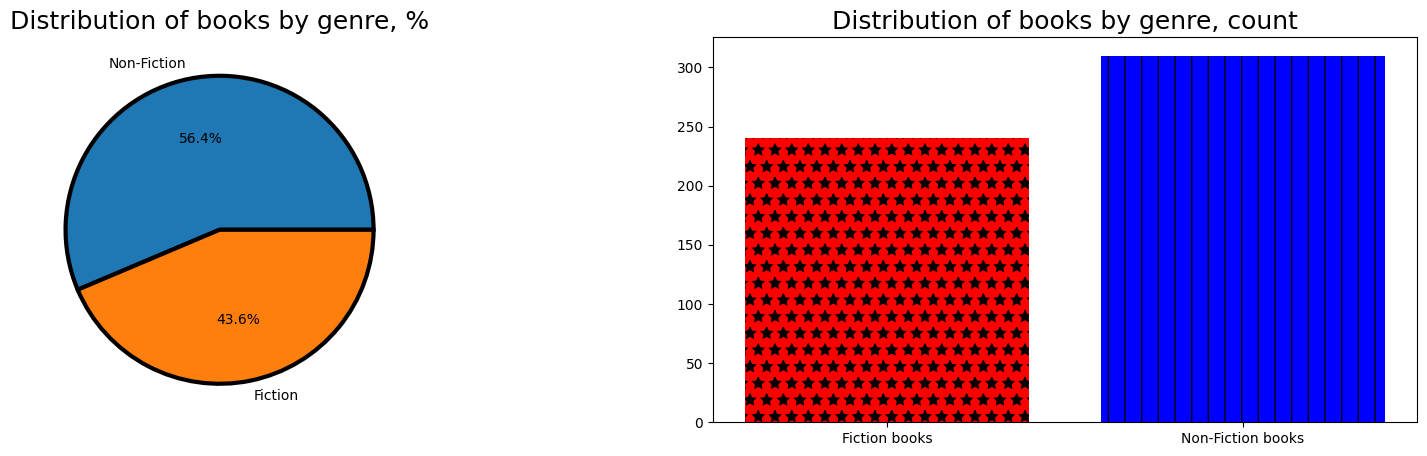

In [24]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title("Distribution of books by genre, %", fontsize=18, loc="center")
plt.pie(df["genre"].value_counts(), labels=["Non-Fiction", "Fiction"], autopct="%.1f%%", wedgeprops={"edgecolor": "black", "linewidth": 3})

plt.subplot(122)
# define the number of fiction and non-fiction books
fiction_books = len(df[df["genre"] == "Fiction"])
non_fiction_books = len(df[df["genre"] == "Non Fiction"])

plt.title("Distribution of books by genre, count", fontsize=18, loc="center")
plt.bar(x="Fiction books", height=fiction_books, color="red", hatch="*")
plt.bar(x="Non-Fiction books", height=non_fiction_books, color="blue", hatch="|")

plt.show()